## import Libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


## Part 1
- read data in dataframe format 

In [2]:
df = pd.read_csv('2019-2020 All leagues Stats.csv')
df.head(5)

,League,Team,Season,KEY,Player,Position,Appearances,Goals,Started,Started As A Sub,...,Minutes per Yellow Cards,Sent Off,Straight Red Card,Two Yellow Cards,Red - First Half,Red - Second Half,Red - Home,Red - Away,Red - Minutes Played,Minutes per Red Cards
0,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,NaN,NaN,NaN,59,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Virgil van Dijk,Defender,26,4,26,0,...,2340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Trent Alexander-Arnold,Defender,26,2,25,1,...,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Andrew Robertson,Defender,26,1,25,1,...,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Roberto Firmino,Midfielder,26,8,24,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- replcae - with nan

In [3]:
df = df.replace('-', np.nan)
df = df.replace('No data found', np.nan)
df = df.replace('No scorers found', np.nan)
df = df[~df['Player'].isna()]

In [4]:
zero_list = ['Goals', 'Cross', 'Free Kick', 'Direct Free Kick', 'First Scorer', 'Last Scorer', 'Corner', 'CS']
for i in zero_list:
    df[i].fillna(0,inplace=True)


- determine threshold and ratio of missing data
- drop the features with missing data ratio over threshold


In [5]:
threshold = 0.8
norm_null = df.isnull().sum()/len(df)
dropped_features = norm_null.loc[norm_null > threshold].index
df = df.drop(dropped_features,axis=1)

In [6]:
df.head(5)

,League,Team,Season,KEY,Player,Position,Appearances,Goals,Started,Started As A Sub,...,Direct Free Kick,Corner,CS,Yellow Cards,Yellow - First Half,Yellow - Second Half,Yellow - Home,Yellow - Away,Yelow - Minutes Played,Minutes per Yellow Cards
1,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Virgil van Dijk,Defender,26,4,26,0,...,0,3,0.0,1,NaN,1,NaN,1,2340,2340
2,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Trent Alexander-Arnold,Defender,26,2,25,1,...,0,0,0.0,4,1,3,2,2,2280,570
3,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Andrew Robertson,Defender,26,1,25,1,...,0,0,0.0,1,NaN,1,NaN,1,2265,2265
4,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Roberto Firmino,Midfielder,26,8,24,2,...,0,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Georginio Wijnaldum,Midfielder,25,2,25,0,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- fill nan with mode of each column

In [7]:
df = df.apply(pd.to_numeric, errors='ignore')
# for i in list(df.columns):
#     df[i].fillna(df[i].mode()[0],inplace=True)

for i in df.columns:
    df[i].fillna(0,inplace=True)

# for i in mean_list:
#     df[i].fillna(df[i].mean(),inplace=True)

# for i in frequent_list:
#     df[i].fillna(df[i].mode()[0],inplace=True)

In [8]:
df_copy = df.copy()

df_none_num = df.select_dtypes(include=np.object_)

# non_numeric -> categorical -> numeric
for i in list(df_none_num.columns):
    df[i] = df[i].astype('category')
    df[i] = df[[i]].apply(lambda x: x.cat.codes)
    df[i] = df[i].astype('int64')

# back to the original 
# for i in list(df_none_num.columns):
#     if i in df.columns:
#         df[i] = df_copy[i]


In [9]:
threshold = 0.01
variance = df.var()
dropped_features = variance.loc[variance < threshold].index
dropped_features

Index(['Season', 'Type Of Goal'], dtype='object')

In [10]:
df = df.drop(dropped_features,axis=1)

In [11]:
list(df.columns)

['League',
 'Team',
 'KEY',
 'Player',
 'Position',
 'Appearances',
 'Goals',
 'Started',
 'Started As A Sub',
 'Came On',
 'Taken Off',
 'Own Goals',
 'First Half',
 'Second Half',
 'First Scorer',
 'Last Scorer',
 'Home',
 'Away',
 'Right Foot',
 'Open Play',
 'Cross',
 'Free Kick',
 'Direct Free Kick',
 'Corner',
 'CS',
 'Yellow Cards',
 'Yellow - First Half',
 'Yellow - Second Half',
 'Yellow - Home',
 'Yellow - Away',
 'Yelow - Minutes Played',
 'Minutes per Yellow Cards']

In [12]:
df

,League,Team,KEY,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,...,Direct Free Kick,Corner,CS,Yellow Cards,Yellow - First Half,Yellow - Second Half,Yellow - Home,Yellow - Away,Yelow - Minutes Played,Minutes per Yellow Cards
1,3,59,67,3040,0,26,4,26,0,0,...,0,3,0.0,1.0,0.0,1.0,0.0,1.0,2340.0,2340.0
2,3,59,67,2983,0,26,2,25,1,1,...,0,0,0.0,4.0,1.0,3.0,2.0,2.0,2280.0,570.0
3,3,59,67,237,0,26,1,25,1,1,...,0,0,0.0,1.0,0.0,1.0,0.0,1.0,2265.0,2265.0
4,3,59,67,2541,3,26,8,24,2,2,...,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3,59,67,1051,3,25,2,25,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,4,48,81,1906,3,2,0,1,1,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0
3327,4,48,81,270,3,1,0,1,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3328,4,48,81,1624,2,0,0,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,4,48,81,472,0,0,0,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## remove Position

In [13]:
number_of_clusters = 4
true_labels = df['Position'].to_numpy()
df = df.drop('Position', axis=1)
data = df.to_numpy()

In [14]:
model = KMeans(n_clusters=number_of_clusters)
model.fit(df.to_numpy())
labels = model.labels_

### Hungarian (Munkres) algorithm to reordering cluster numbers for correct correspondence

- source: https://gist.github.com/siolag161/dc6e42b64e1bde1f263b
- !pip install munkres

In [15]:
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

cost_matrix_scikit = make_cost_matrix(labels, true_labels)

m_scikit = Munkres()
indexes_scikit = m_scikit.compute(cost_matrix_scikit)
mapper_scikit = { old: new for (old, new) in indexes_scikit}
new_labels_scikit = translate_clustering(labels, mapper_scikit)


## visualization

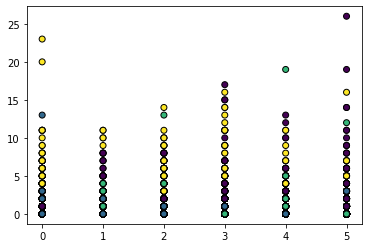

In [16]:
plt.scatter(data[:, 0], data[:, 5], c=new_labels_scikit.astype(int), edgecolor='k')
plt.show()

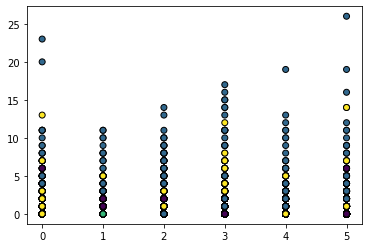

In [17]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 5], c=true_labels.astype(int), edgecolor='k')
plt.show()

In [18]:
c_matrix = confusion_matrix(true_labels, new_labels_scikit)

print(f"classification report:\n{classification_report(true_labels, new_labels_scikit)}")
print(f"confusion_matrix:\n{c_matrix}")

classification report:
              precision    recall  f1-score   support

           0       0.37      0.25      0.30       982
           1       0.23      0.34      0.28       650
           2       0.15      0.43      0.22       350
           3       0.44      0.23      0.30      1237

    accuracy                           0.28      3219
   macro avg       0.30      0.31      0.28      3219
weighted avg       0.35      0.28      0.29      3219

confusion_matrix:
[[250 245 274 213]
 [120 219 208 103]
 [ 34 134 149  33]
 [263 344 351 279]]
